# Testing cluster algorithms

In [36]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering

import pandas as pd
import seaborn as sns
import matplotlib as plt

from visualization import *
#from graphtools import *
from clustertools import *
#from chameleon import *

In [2]:
df_base = pd.read_csv('./datasets/Aggregation.csv', sep=' ', header=None)

In [3]:
df_base.columns = ['x', 'y']

### First data visualization 

Text(0.5, 1.0, 'Scatter Plot')

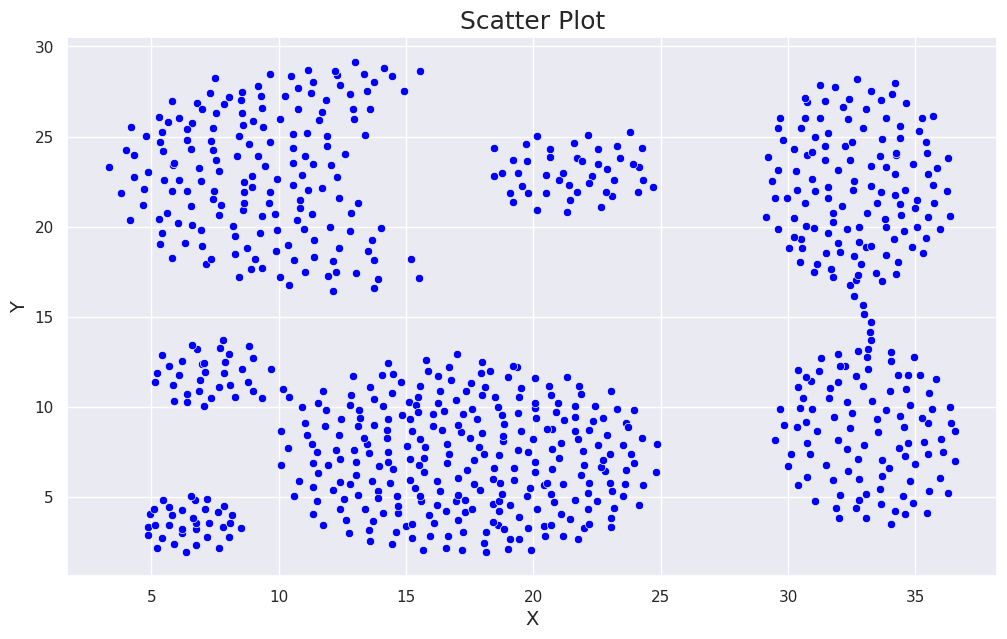

In [4]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
ax = sns.scatterplot(data=df_base, x='x', y='y', color='blue')
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('Scatter Plot', fontsize = 18)

### Test KMeans

In [5]:
# Create feature matrix
X = df_base.values

# Perform KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=42)
labels = kmeans.fit_predict(X)

In [6]:
KMeans_df = df_base.copy()
KMeans_df['label'] = labels
#KMeans_df.to_csv('./dfKMeanslabels.csv', index=False)

Text(0.5, 1.0, 'KMeans Clustring')

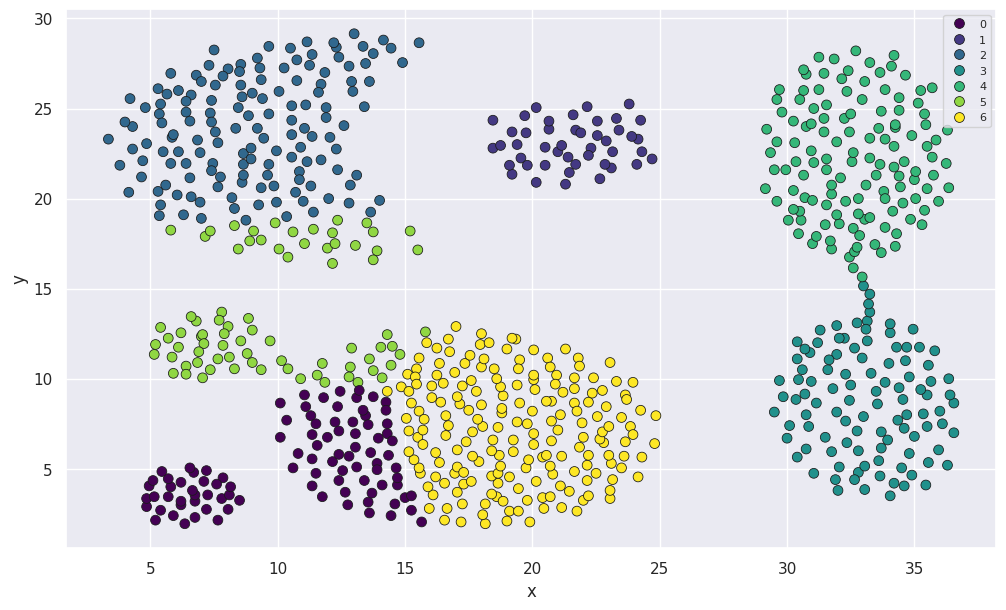

In [7]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
sns.scatterplot(data=KMeans_df, x='x', y='y', hue=labels, palette='viridis', edgecolor='k', s=50)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('KMeans Clustring', fontsize = 18)

### Correct clustering

In [8]:
df134 = KMeans_df.copy()
df134 = KMeans_df[~KMeans_df['label'].isin([0,2,5,6])]
df134.loc[df134['label']==4, 'label'] = 3


Text(0.5, 1.0, 'KMeans Clustring')

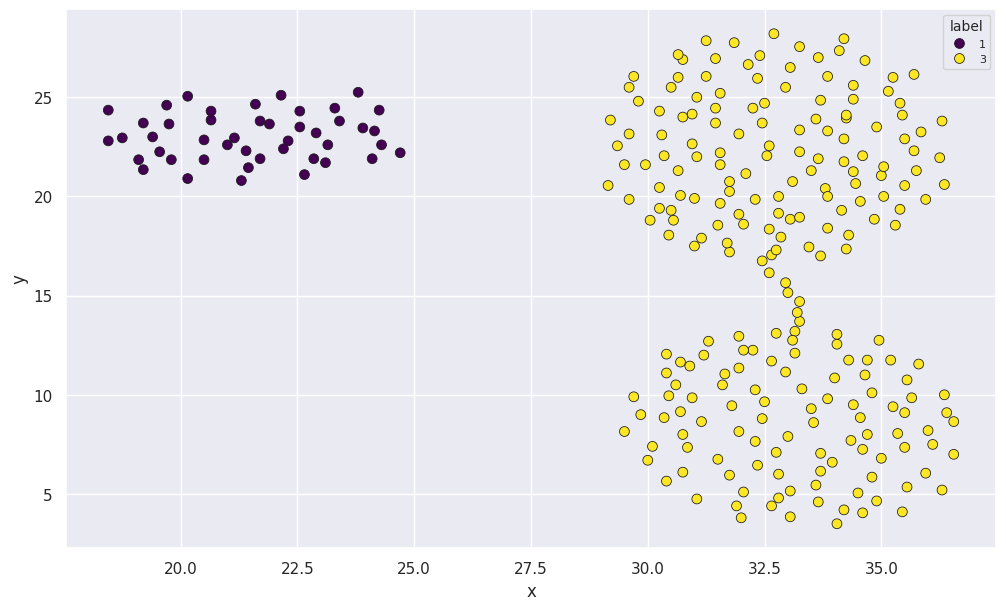

In [9]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
sns.scatterplot(data=df134, x='x', y='y', hue=df134.label, palette='viridis', edgecolor='k', s=50)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('KMeans Clustring', fontsize = 18)

In [10]:
df_filtered = KMeans_df[~KMeans_df['label'].isin([1, 3, 4])]

Text(0.5, 1.0, 'KMeans Clustring')

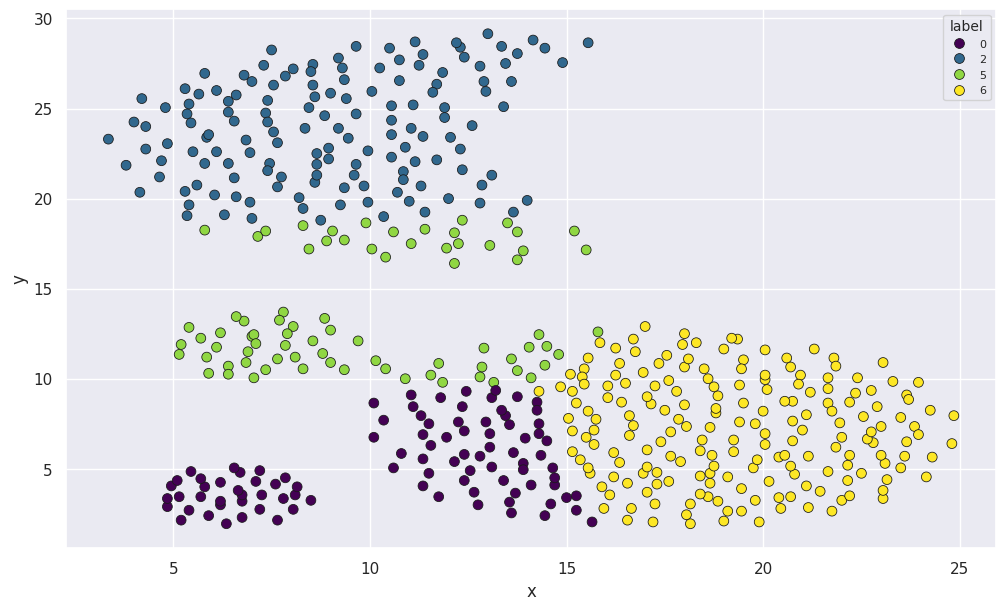

In [11]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
sns.scatterplot(data=df_filtered, x='x', y='y', hue=df_filtered.label, palette='viridis', edgecolor='k', s=50)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('KMeans Clustring', fontsize = 18)

In [12]:
df_filtered.loc[df_filtered['y']>15, 'label'] = 2
df_filtered.loc[(df_filtered['label']==0) & (df_filtered['x']>9), 'label']=6
df_filtered.loc[(df_filtered['label']==5) & (df_filtered['x']>10), 'label']=6

Text(0.5, 1.0, 'Chameleon Clustering')

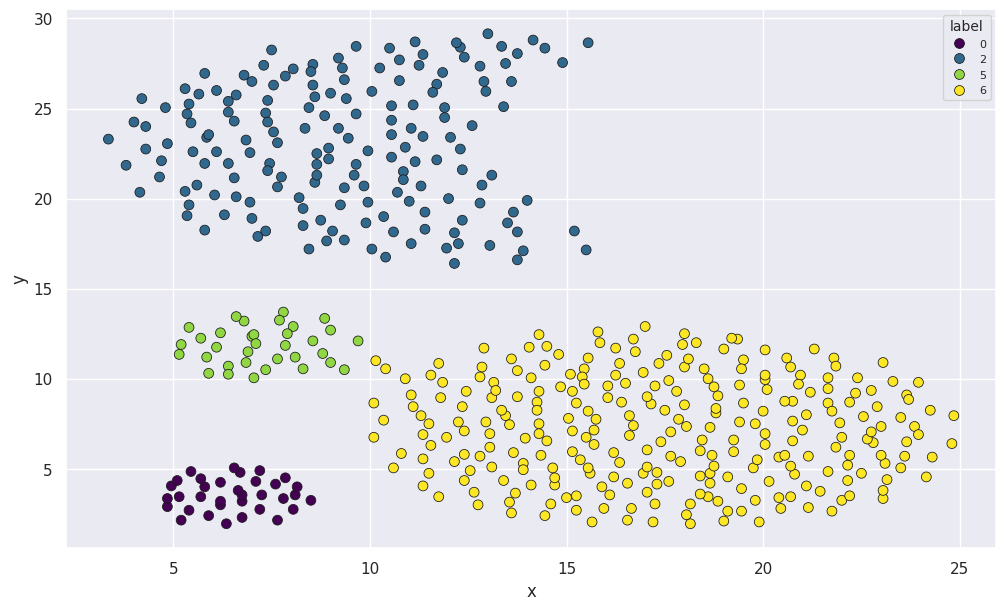

In [13]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
sns.scatterplot(data=df_filtered, x='x', y='y', hue=df_filtered.label, palette='viridis', edgecolor='k', s=50)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('Chameleon Clustering', fontsize = 18)

In [14]:
df_complete = pd.concat([df_filtered, df134], axis=0)
df_complete.reset_index(drop=True, inplace=True)

print(df_complete.head())

       x      y  label
0  15.55  28.65      2
1  14.90  27.55      2
2  14.45  28.35      2
3  14.15  28.80      2
4  13.75  28.05      2


In [16]:
df_complete.loc[df_complete['label']==5, 'label'] = 4
df_complete.loc[df_complete['label']==6, 'label'] = 5


Text(0.5, 1.0, 'Chameleon Clustering')

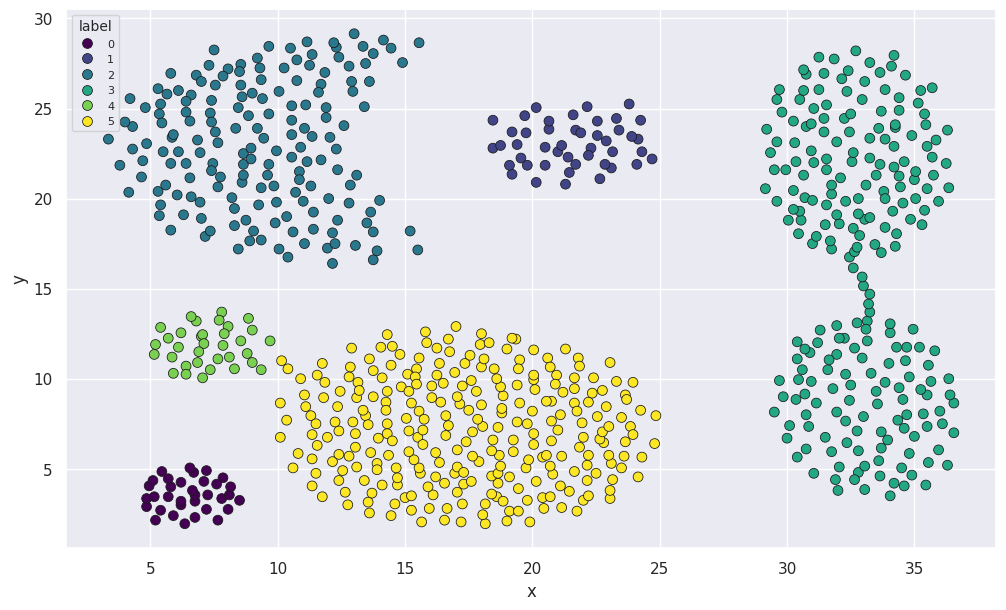

In [17]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
sns.scatterplot(data=df_complete, x='x', y='y', hue=df_complete.label, palette='viridis', edgecolor='k', s=50)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('Chameleon Clustering', fontsize = 18)

## Testing DBSCAN

In [32]:
X = coordinates_array = df_base[['x', 'y']].values
dbscan = DBSCAN(eps=2, min_samples=2).fit(X)
dbscan_df = df_base.copy()
dbscan_df['label'] = dbscan.labels_

Text(0.5, 1.0, 'DBSCAN Clustering')

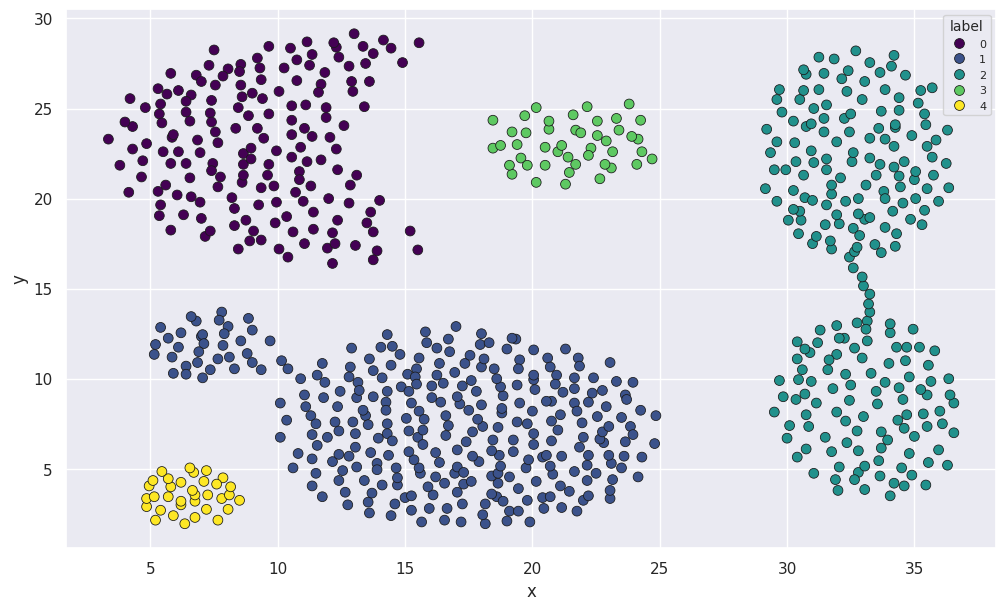

In [33]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
sns.scatterplot(data=dbscan_df, x='x', y='y', hue=dbscan_df.label, palette='viridis', edgecolor='k', s=50)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('DBSCAN Clustering', fontsize = 18)

### Testing OPTICS

In [29]:
# Create feature matrix
X = df_base.values

# Perform KMeans clustering
optics = OPTICS(min_samples=2, xi=0.05, min_cluster_size=0.05)
labels = kmeans.fit_predict(X)

In [30]:
OPTICS_df = df_base.copy()
OPTICS_df['label'] = labels

Text(0.5, 1.0, 'OPTICS Clustring')

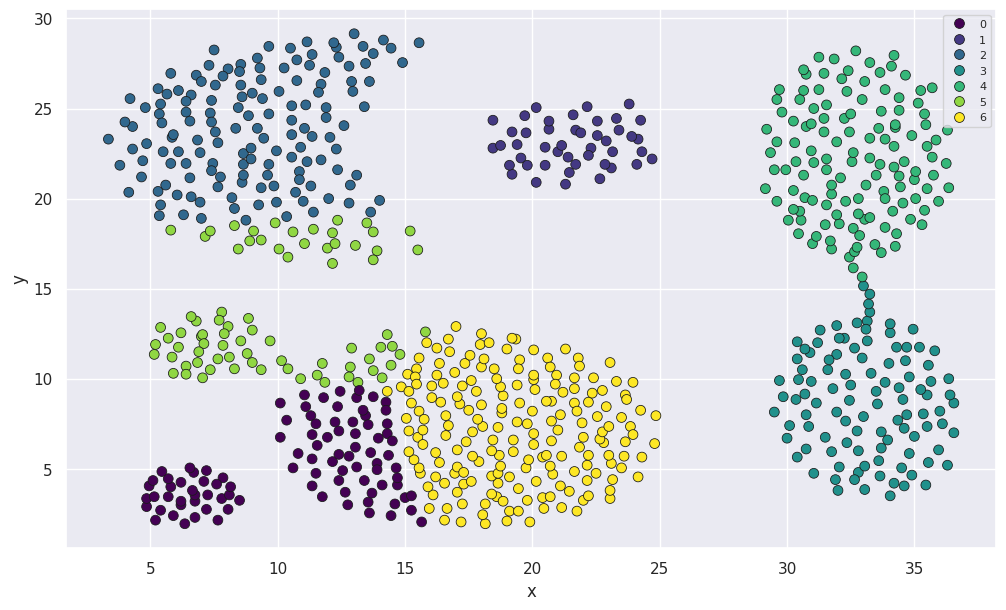

In [31]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
sns.scatterplot(data=OPTICS_df, x='x', y='y', hue=labels, palette='viridis', edgecolor='k', s=50)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('OPTICS Clustring', fontsize = 18)

### Testing Birch

In [33]:
# Create feature matrix
X = df_base.values

# Perform KMeans clustering
brc = Birch(n_clusters=None)
labels = brc.fit_predict(X)

In [34]:
brc_df = df_base.copy()
brc_df['label'] = labels

Text(0.5, 1.0, 'Birch Clustring')

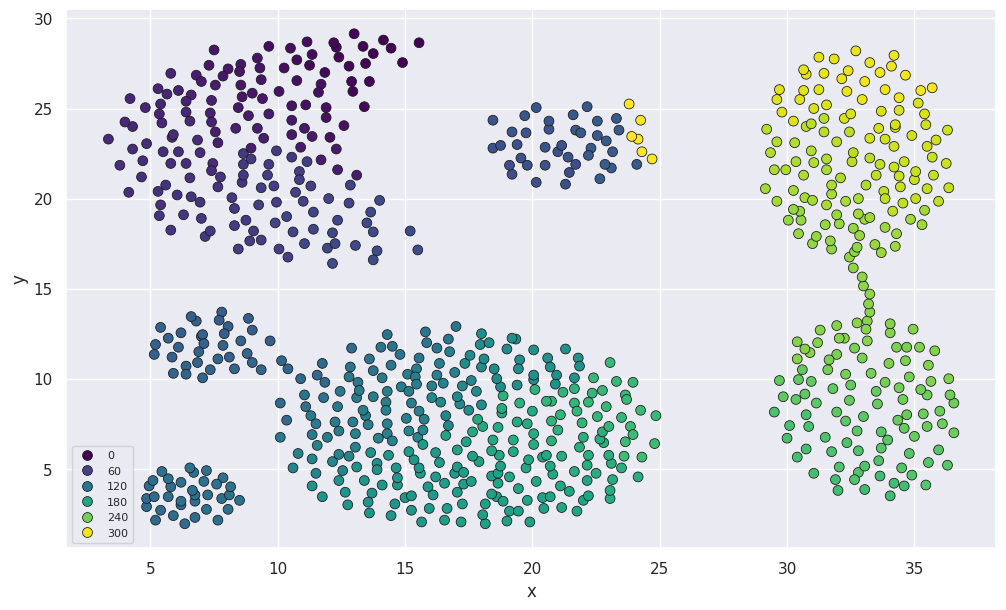

In [35]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
sns.scatterplot(data=brc_df, x='x', y='y', hue=labels, palette='viridis', edgecolor='k', s=50)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('Birch Clustring', fontsize = 18)
##need better understanding of the labels

### Testing Spectral Clustering

In [37]:
# Create feature matrix
X = df_base.values

# Perform KMeans clustering
Spectral = SpectralClustering(n_clusters=6, assign_labels='discretize', random_state=42)
labels = Spectral.fit_predict(X)

In [38]:
Spectral_df = df_base.copy()
Spectral_df['label']=labels

In [ ]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
sns.scatterplot(data=Spectral_df, x='x', y='y', hue=labels, palette='viridis', edgecolor='k', s=50)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('Birch Clustring', fontsize = 18)